<a href="https://colab.research.google.com/github/lpierson23/ASL-Sign-Recognition/blob/main/CV_Part3_FeatureDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 83.1 MB/s 


Handedness: [classification {
  index: 0
  score: 0.992409884929657
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.667597770690918
  y: 0.6306507587432861
  z: -4.944453735333809e-07
}
landmark {
  x: 0.7389771342277527
  y: 0.5283417105674744
  z: -0.008410870097577572
}
landmark {
  x: 0.7654226422309875
  y: 0.4131911098957062
  z: -0.0047042034566402435
}
landmark {
  x: 0.7631513476371765
  y: 0.3062949776649475
  z: -0.003505355678498745
}
landmark {
  x: 0.7586942911148071
  y: 0.23007981479167938
  z: 0.004508769139647484
}
landmark {
  x: 0.7198891639709473
  y: 0.34580302238464355
  z: 0.017348626628518105
}
landmark {
  x: 0.7164646983146667
  y: 0.2592781186103821
  z: -0.007582631427794695
}
landmark {
  x: 0.7207514643669128
  y: 0.34082967042922974
  z: -0.017936434596776962
}
landmark {
  x: 0.7178770303726196
  y: 0.383280485868454
  z: -0.019852563738822937
}
landmark {
  x: 0.6738185286521912
  y: 0.36244961619377136
  z: 0.012935176491737366
}
landmark {
  x:

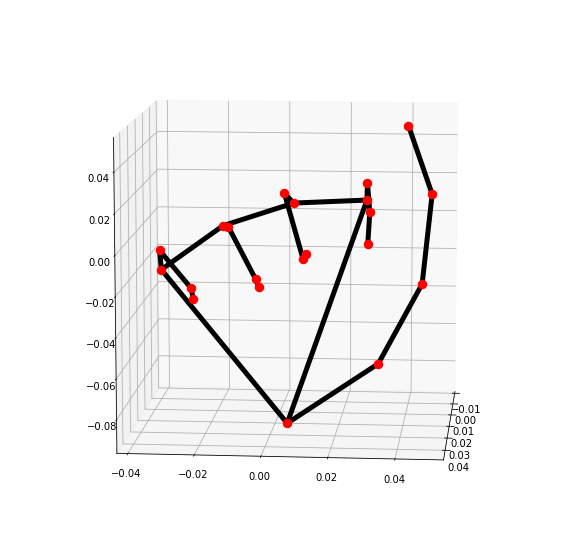

Handedness: [classification {
  index: 0
  score: 0.9854018688201904
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.6482159495353699
  y: 0.768333911895752
  z: 5.241785174803226e-07
}
landmark {
  x: 0.6880132555961609
  y: 0.6728763580322266
  z: -0.023284047842025757
}
landmark {
  x: 0.6719056367874146
  y: 0.5581051111221313
  z: -0.026141509413719177
}
landmark {
  x: 0.6197642087936401
  y: 0.5106739401817322
  z: -0.02775775082409382
}
landmark {
  x: 0.5752081274986267
  y: 0.531374990940094
  z: -0.02796192094683647
}
landmark {
  x: 0.6462367177009583
  y: 0.4669123888015747
  z: 0.002928246511146426
}
landmark {
  x: 0.6279463171958923
  y: 0.3568779528141022
  z: -0.003822499653324485
}
landmark {
  x: 0.6131601929664612
  y: 0.2941218614578247
  z: -0.014656486921012402
}
landmark {
  x: 0.598219096660614
  y: 0.24363838136196136
  z: -0.023160232231020927
}
landmark {
  x: 0.6021235585212708
  y: 0.47595149278640747
  z: 0.003619204042479396
}
landmark {
  x: 0.58

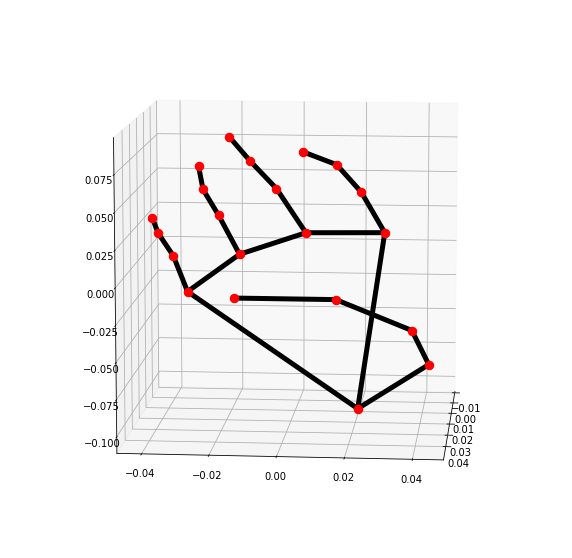

In [6]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = ['/content/drive/MyDrive/Computer Vision/Project Images/A/A_0001.jpg', '/content/drive/MyDrive/Computer Vision/Project Images/B/B_0002.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)